# Model Benchmarking

Here we compare the speed of the different model versions, specifically focussing on tokens/s.

Note, something to keep in mind is that having a faster model w.r.t tokens/s doesn't always mean it's better. For example, we may change something in the architecture that makes the model run slower but which produces a better model in the end. Nevertheless looking at tokens/s is still a fun and interesting comparison to make, especially for changes that do not change the learning characteristics of the model just make the underlying code more optimized, e.g. things like flash attention, and KV caching.

In [3]:
from gollem.utils import get_base_dir_path
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Experiment params

# Results
# 't': mean iteration time (s)
# 'mem': peak GPU mem usage (MiB)
results_path = (
    get_base_dir_path()
    / "results"
    / "gpt2_speed_benchmarking"
    / "physical_results_2025-01-19_12-36-46.csv"
)
df = pd.read_csv(results_path)

print(df.columns)


Index(['run_name', 'time', 'mean_tps', 'peak_mem_usage'], dtype='object')


(3261.202389399538, 4182.273009738886)

<Figure size 4000x4000 with 0 Axes>

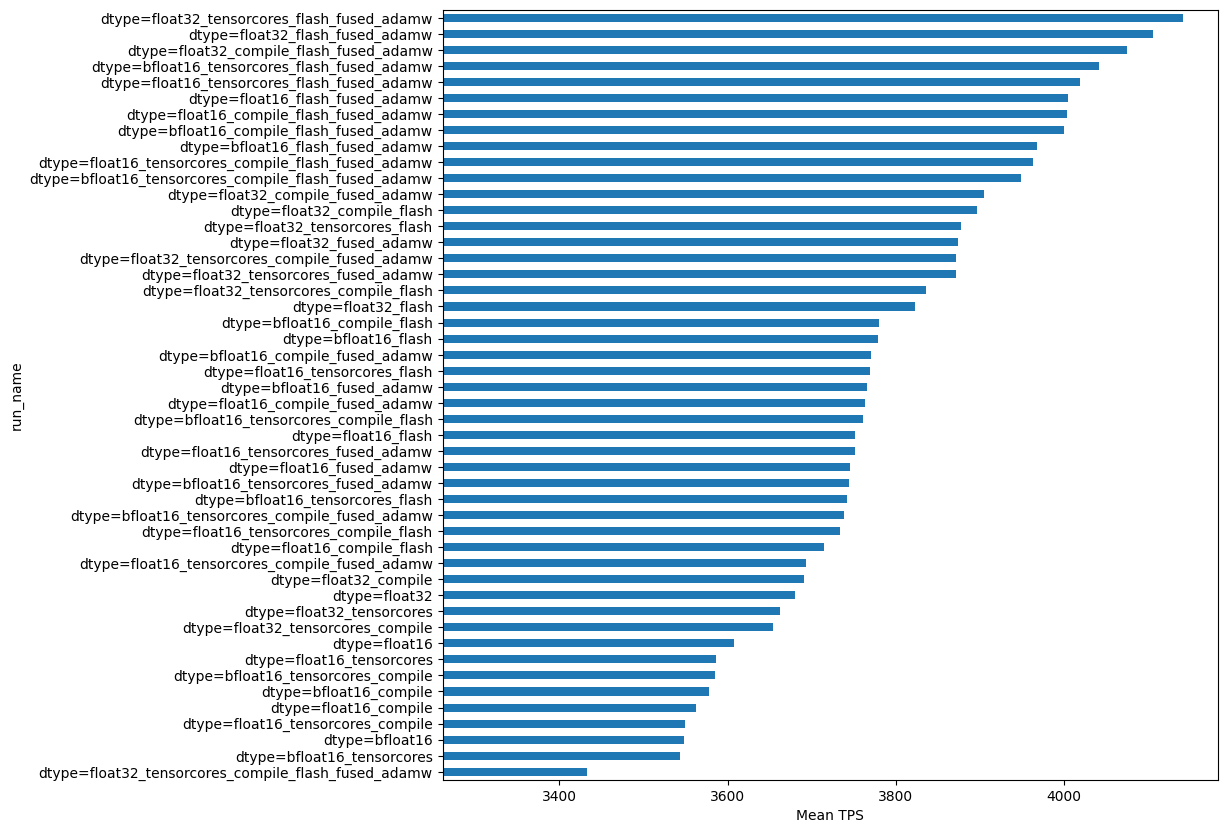

In [4]:
df = df.sort_values(by="mean_tps", ascending=True)

n_rows = len(df)
fig_height = max(10, n_rows * 0.2)
plt.figure(figsize=(40, 40))

ax = df.plot(
    x="run_name", y="mean_tps", kind="barh", figsize=(10, fig_height), legend=False
)
ax.set_xlabel("Mean TPS")
ax.set_xlim(min(df["mean_tps"]) * 0.95, max(df["mean_tps"]) * 1.01)

(2017.8, 2294.72)

<Figure size 4000x4000 with 0 Axes>

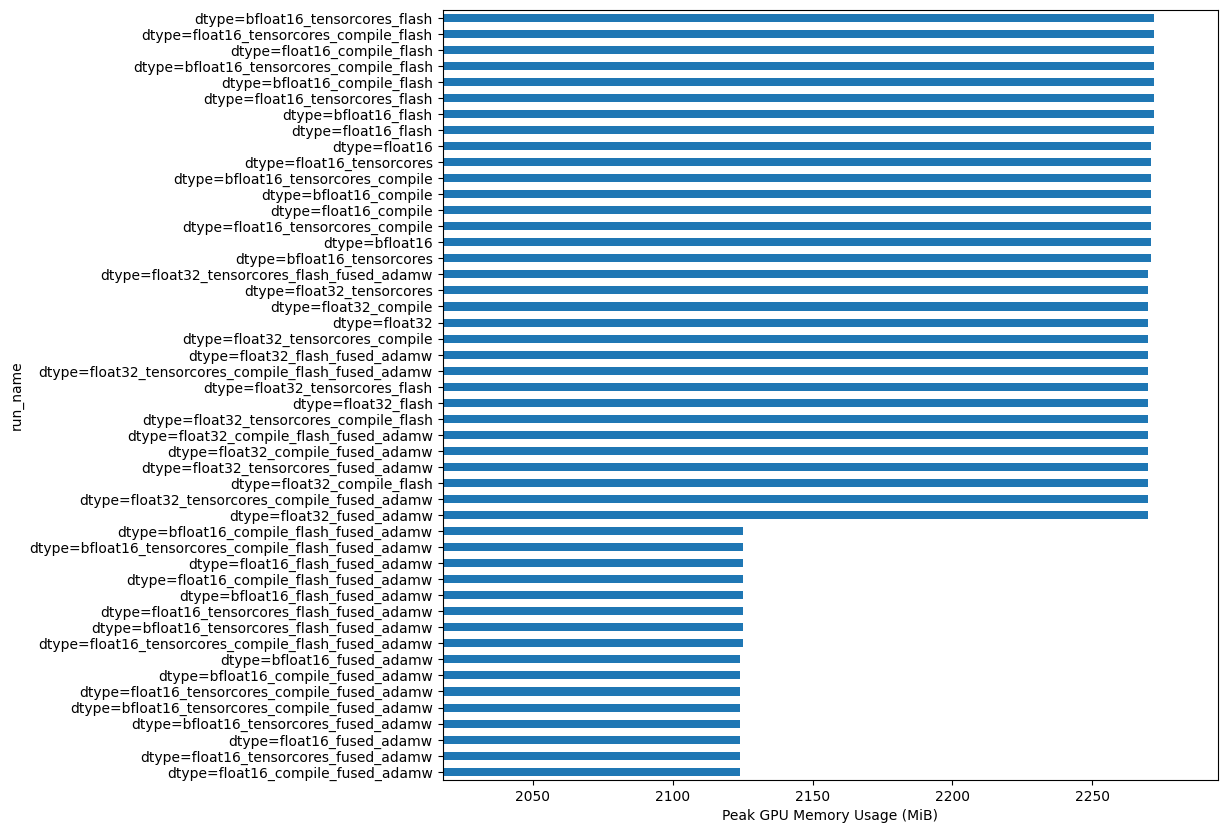

In [5]:
y_label = "peak_mem_usage"
df = df.sort_values(by=y_label, ascending=True)

n_rows = len(df)
fig_height = max(10, n_rows * 0.2)
plt.figure(figsize=(40, 40))

ax = df.plot(
    x="run_name", y=y_label, kind="barh", figsize=(10, fig_height), legend=False
)
ax.set_xlabel("Peak GPU Memory Usage (MiB)")
ax.set_xlim(min(df[y_label]) * 0.95, max(df[y_label]) * 1.01)

In [6]:
# Percent speed up over base



In [7]:
# Memory saving over base
